In [3]:
# Import libraries needed
'''
IPython: Interactive Python is an enhanced Python shell that provides improved interactive features
and is commonly used for data analysis and scientific computing.
pandas: Pandas is a Python library used for data manipulation and analysis. It provides data structures
for efficiently storing and manipulating data, as well as tools for reading and writing data between
in-memory data structures and different file formats.
numpy: NumPy is a Python library used for scientific computing and numerical analysis.
It provides fast and efficient multidimensional arrays (ndarrays) for storing and manipulating numerical data.
sklearn.preprocessing: Scikit-learn is a Python library used for machine learning and data mining. The preprocessing
module provides functions for scaling, encoding, and transforming data before using it for machine learning algorithms.
MinMaxScaler: A normalization technique that scales the data between 0 and 1.
LabelEncoder: A preprocessing tool that converts categorical data into numerical data.
train_test_split: A function used to split data into training and testing sets for machine learning algorithms.
seaborn: Seaborn is a Python library used for data visualization. It provides a high-level interface for creating
informative and attractive statistical graphics.
matplotlib.pyplot: Matplotlib is a plotting library for Python that provides a variety of plotting functions for
creating 2D and 3D plots. The pyplot module provides a convenient interface for creating plots and charts.
'''
import IPython
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
'''
This line of code sets the maximum number of columns to display in Pandas dataframes to None,
meaning that all columns will be displayed.
Next line of code sets the default figure size for Seaborn plots to 11 inches wide by 4 inches tall.
This ensures that Seaborn plots are legible and have a consistent size when they are displayed.
'''
pd.options.display.max_columns = None
sns.set(rc={'figure.figsize':(11,4)})

In [5]:
# reading dataset
df = pd.read_excel("Sheet forming/Test plan_d-optimal_300_with_dummydata.xlsx", skiprows=1)
df.drop(labels=['Unnamed: 6','Min Inner radius',1156.8582], axis=1, inplace=True)
df.head()

,bed width b,sheet thickness spring steel,sheet thickness aluminum,scale factor material properties aluminum,bottom dead centre,radius
0,180,1.6,3.4,1.1,1.2,1881.9072
1,180,1.4,3.0,1.1,1.2,3823.9019
2,180,1.5,3.4,0.9,1.2,2439.7469
3,180,1.4,3.4,1.1,0.4,1875.8303
4,130,1.5,3.4,1.1,1.2,1472.5146


In [6]:
df.shape

(300, 6)

## EDA

In [7]:
'''
it will only return the summary statistics for the numerical columns in the DataFrame. The summary statistics include:
count: the number of non-missing values in each column
mean: the arithmetic mean (average) of each column
std: the standard deviation of each column
min: the minimum value of each column
25%: the first quartile of each column
50%: the median (second quartile) of each column
75%: the third quartile of each column
max: the maximum value of each column
These summary statistics can provide valuable insight into the distribution and range of values in a DataFrame,
and can help to identify any outliers or anomalies in the data.
'''
df.describe()

,bed width b,sheet thickness spring steel,sheet thickness aluminum,scale factor material properties aluminum,bottom dead centre,radius
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,155.366667,1.500000,3.200667,1.000000,0.798667,2014.433586
std,17.141909,0.082194,0.141420,0.070474,0.284725,526.425976
min,130.000000,1.400000,3.000000,0.900000,0.400000,1156.858200
25%,140.000000,1.400000,3.100000,0.950000,0.600000,1618.976500
50%,160.000000,1.500000,3.200000,1.000000,0.800000,1910.986600
75%,170.000000,1.600000,3.300000,1.050000,1.000000,2322.676700
max,180.000000,1.600000,3.400000,1.100000,1.200000,3823.901900


In [8]:
'''
it provides a concise summary of a DataFrame. 
This method can be used to quickly check the structure and content of a DataFrame, and to identify any
missing values or inconsistencies in the data.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   bed width b                                300 non-null    int64  
 1   sheet thickness spring steel               300 non-null    float64
 2   sheet thickness aluminum                   300 non-null    float64
 3   scale factor material properties aluminum  300 non-null    float64
 4   bottom dead centre                         300 non-null    float64
 5   radius                                     300 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 14.2 KB


In [9]:
print(f'Rows and Columns are: {df.shape[0]}, {df.shape[1]}')

Rows and Columns are: 300, 6


In [10]:

print(f'Missing values in data are: {len(df[df.isna().any(1)])}')
print(df.isna().sum())
df.dropna(inplace=True)

Missing values in data are: 0
bed width b                                  0
sheet thickness spring steel                 0
sheet thickness aluminum                     0
scale factor material properties aluminum    0
bottom dead centre                           0
radius                                       0
dtype: int64


In [11]:
print(f"Duplicated rows in data are: {len(df)-len(df.drop_duplicates(keep='first'))}")

Duplicated rows in data are: 0


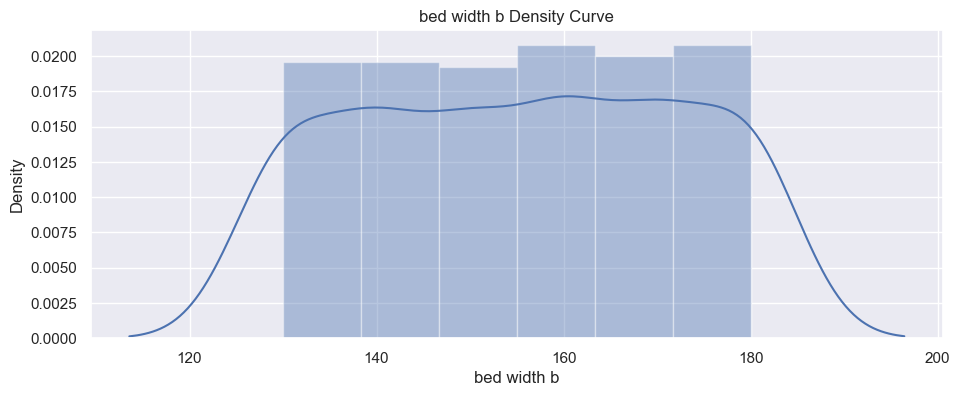

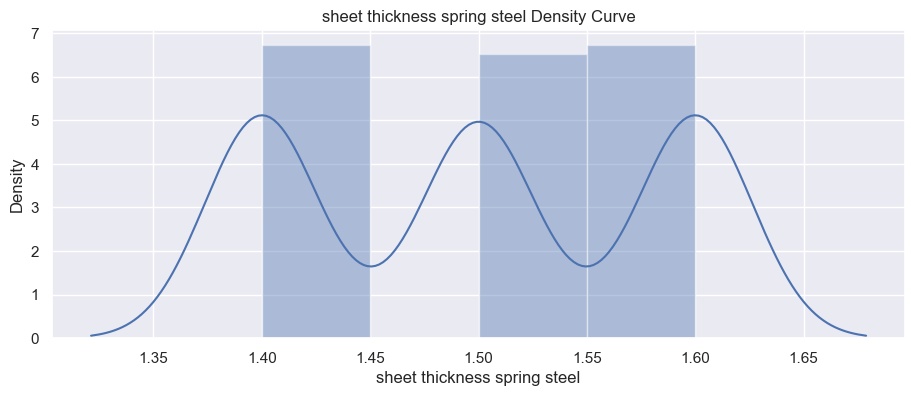

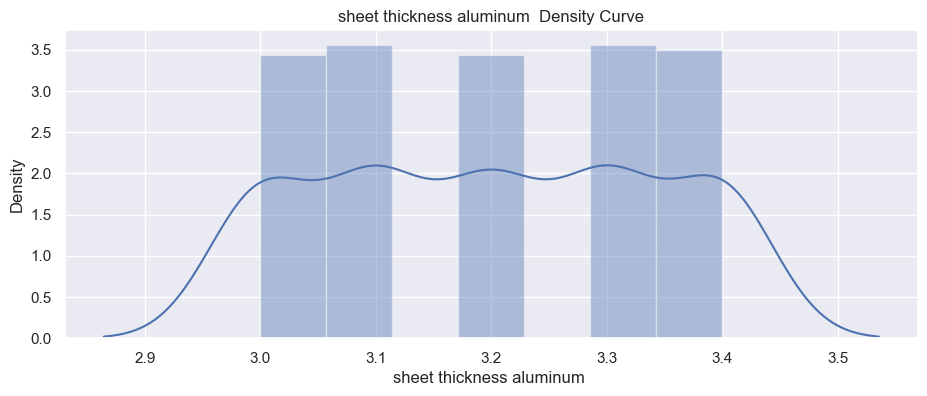

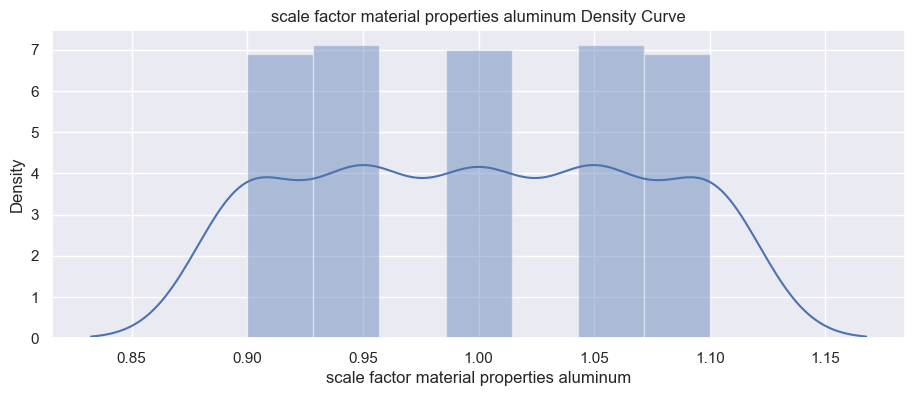

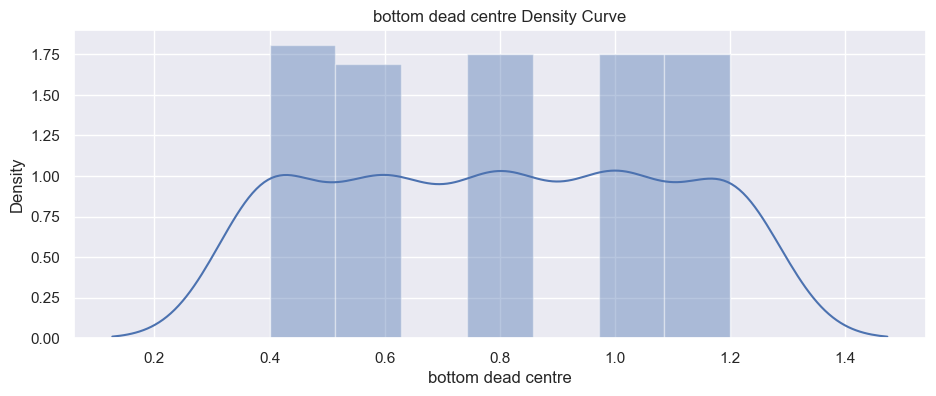

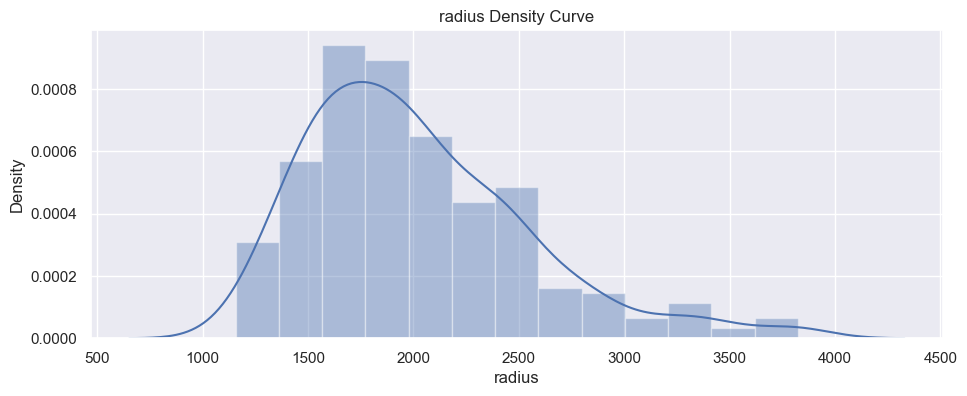

In [12]:
'''
This allows you to visualize the distribution of values for each column in the DataFrame and identify
any patterns or anomalies in the data.
'''
for col in df.columns:
    plt.title(f"{col} Density Curve")
    sns.distplot(df[col],)
    plt.show()

## Preprocessing

In [13]:
df.head()

,bed width b,sheet thickness spring steel,sheet thickness aluminum,scale factor material properties aluminum,bottom dead centre,radius
0,180,1.6,3.4,1.1,1.2,1881.9072
1,180,1.4,3.0,1.1,1.2,3823.9019
2,180,1.5,3.4,0.9,1.2,2439.7469
3,180,1.4,3.4,1.1,0.4,1875.8303
4,130,1.5,3.4,1.1,1.2,1472.5146


In [14]:
features_scaler = {}
for col in df.columns:
    scaler = MinMaxScaler()
    df.loc[:,col] = scaler.fit_transform(df[[col]])
    features_scaler[col] = scaler

## Modeling

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### ANN Case:1 Step 1

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Mean Squared Error (MSE): {:.4f}".format(mse))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("R-squared (R2): {:.4f}".format(r2))

In [18]:
df.head(3)

,bed width b,sheet thickness spring steel,sheet thickness aluminum,scale factor material properties aluminum,bottom dead centre,radius
0,1.0,1.0,1.0,1.0,1.0,0.271855
1,1.0,0.0,0.0,1.0,1.0,1.000000
2,1.0,0.5,1.0,0.0,1.0,0.481015


In [19]:
X = df.drop(labels=['radius'], axis=1)
y = df['radius']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

In [20]:
# Create the model
radius_model = Sequential()

# Add the first hidden layer
radius_model.add(Dense(units=8, activation='relu', input_dim=x_train.shape[1]))
radius_model.add(Dense(units=64, activation='relu'))
# Add the output layer with sigmoid activation
radius_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
radius_model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_absolute_error'])

In [21]:
# Train the model
radius_model.fit(x_train, y_train,
          epochs=200,
          batch_size=8,
          verbose=1,
         validation_data=(x_test, y_test))

Epoch 1/200
30/30 [==============================] - 2s 23ms/step - loss: 0.0561 - mean_absolute_error: 0.2015 - val_loss: 0.0418 - val_mean_absolute_error: 0.1689
Epoch 2/200
30/30 [==============================] - 0s 4ms/step - loss: 0.0367 - mean_absolute_error: 0.1587 - val_loss: 0.0274 - val_mean_absolute_error: 0.1312
Epoch 3/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.1282 - val_loss: 0.0194 - val_mean_absolute_error: 0.1064
Epoch 4/200
30/30 [==============================] - 0s 9ms/step - loss: 0.0182 - mean_absolute_error: 0.1048 - val_loss: 0.0144 - val_mean_absolute_error: 0.0919
Epoch 5/200
30/30 [==============================] - 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0866 - val_loss: 0.0100 - val_mean_absolute_error: 0.0760
Epoch 6/200
30/30 [==============================] - 0s 11ms/step - loss: 0.0090 - mean_absolute_error: 0.0723 - val_loss: 0.0078 - val_mean_absolute_error: 0.0682
Epoch 7/200
30/30 [=

30/30 [==============================] - 0s 4ms/step - loss: 7.9589e-04 - mean_absolute_error: 0.0188 - val_loss: 8.0236e-04 - val_mean_absolute_error: 0.0179
Epoch 51/200
30/30 [==============================] - 0s 4ms/step - loss: 7.3054e-04 - mean_absolute_error: 0.0187 - val_loss: 7.5750e-04 - val_mean_absolute_error: 0.0180
Epoch 52/200
30/30 [==============================] - 0s 4ms/step - loss: 7.3944e-04 - mean_absolute_error: 0.0190 - val_loss: 8.2157e-04 - val_mean_absolute_error: 0.0182
Epoch 53/200
30/30 [==============================] - 0s 4ms/step - loss: 7.1018e-04 - mean_absolute_error: 0.0179 - val_loss: 7.2427e-04 - val_mean_absolute_error: 0.0159
Epoch 54/200
30/30 [==============================] - 0s 4ms/step - loss: 7.1856e-04 - mean_absolute_error: 0.0180 - val_loss: 7.5963e-04 - val_mean_absolute_error: 0.0180
Epoch 55/200
30/30 [==============================] - 0s 4ms/step - loss: 6.9373e-04 - mean_absolute_error: 0.0179 - val_loss: 7.9765e-04 - val_mean_abso

Epoch 98/200
30/30 [==============================] - 0s 6ms/step - loss: 3.5496e-04 - mean_absolute_error: 0.0133 - val_loss: 5.9452e-04 - val_mean_absolute_error: 0.0192
Epoch 99/200
30/30 [==============================] - 0s 7ms/step - loss: 3.5301e-04 - mean_absolute_error: 0.0140 - val_loss: 4.1336e-04 - val_mean_absolute_error: 0.0119
Epoch 100/200
30/30 [==============================] - 0s 5ms/step - loss: 3.7335e-04 - mean_absolute_error: 0.0135 - val_loss: 4.5290e-04 - val_mean_absolute_error: 0.0150
Epoch 101/200
30/30 [==============================] - 0s 8ms/step - loss: 3.5567e-04 - mean_absolute_error: 0.0136 - val_loss: 3.9236e-04 - val_mean_absolute_error: 0.0122
Epoch 102/200
30/30 [==============================] - 0s 7ms/step - loss: 3.5987e-04 - mean_absolute_error: 0.0135 - val_loss: 4.2941e-04 - val_mean_absolute_error: 0.0133
Epoch 103/200
30/30 [==============================] - 0s 6ms/step - loss: 3.5285e-04 - mean_absolute_error: 0.0134 - val_loss: 3.7797e-0

30/30 [==============================] - 0s 5ms/step - loss: 1.8309e-04 - mean_absolute_error: 0.0094 - val_loss: 1.8522e-04 - val_mean_absolute_error: 0.0083
Epoch 193/200
30/30 [==============================] - 0s 4ms/step - loss: 1.6999e-04 - mean_absolute_error: 0.0090 - val_loss: 1.8246e-04 - val_mean_absolute_error: 0.0081
Epoch 194/200
30/30 [==============================] - 0s 4ms/step - loss: 1.7472e-04 - mean_absolute_error: 0.0092 - val_loss: 1.7659e-04 - val_mean_absolute_error: 0.0082
Epoch 195/200
30/30 [==============================] - 0s 4ms/step - loss: 1.6777e-04 - mean_absolute_error: 0.0093 - val_loss: 1.6740e-04 - val_mean_absolute_error: 0.0081
Epoch 196/200
30/30 [==============================] - 0s 9ms/step - loss: 1.5753e-04 - mean_absolute_error: 0.0087 - val_loss: 1.9530e-04 - val_mean_absolute_error: 0.0088
Epoch 197/200
30/30 [==============================] - 0s 8ms/step - loss: 1.7092e-04 - mean_absolute_error: 0.0090 - val_loss: 1.7725e-04 - val_mean

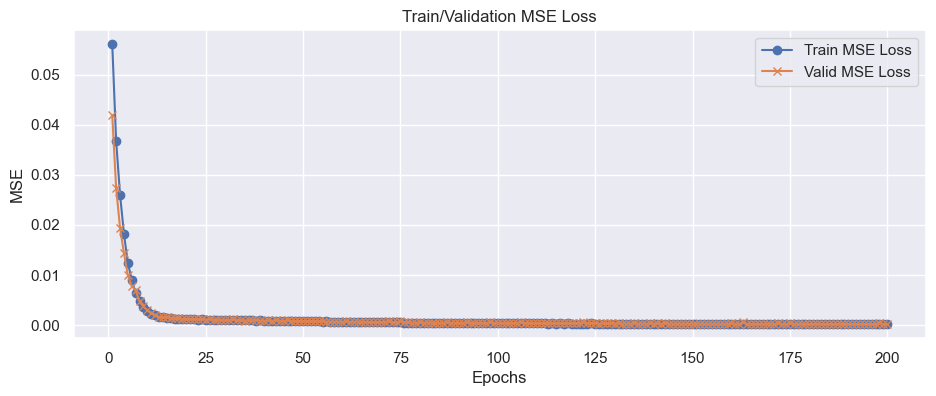

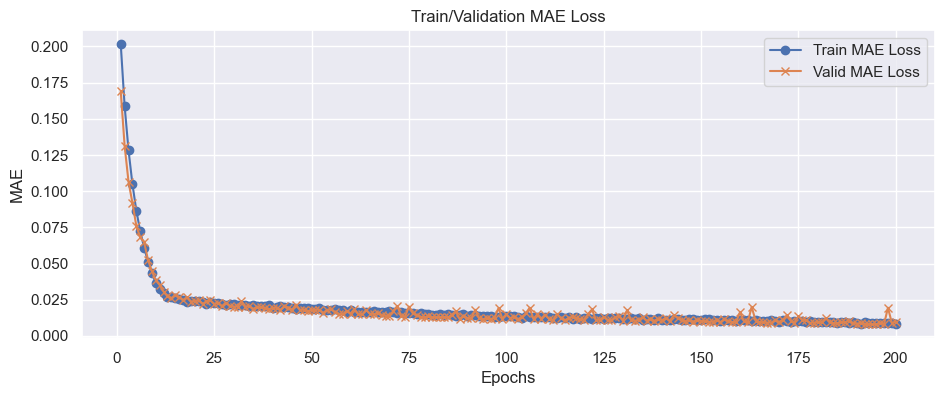

In [22]:
# plotting loss and accuracy 
f, ax = plt.subplots()
ax.plot([None] + radius_model.history.history['loss'], 'o-')
ax.plot([None] + radius_model.history.history['val_loss'], 'x-')

ax.legend(['Train MSE Loss', 'Valid MSE Loss'], loc=1)
ax.set_title('Train/Validation MSE Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
f.show()

f, ax = plt.subplots()
ax.plot([None] + radius_model.history.history['mean_absolute_error'], 'o-')
ax.plot([None] + radius_model.history.history['val_mean_absolute_error'], 'x-')

ax.legend(['Train MAE Loss', 'Valid MAE Loss'], loc=1)
ax.set_title('Train/Validation MAE Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('MAE')
f.show()

In [23]:
y_pred = radius_model.predict(x_test, verbose=0)
evaluate_model(y_test, y_pred)

Mean Squared Error (MSE): 0.0002
Mean Absolute Error (MAE): 0.0099
R-squared (R2): 0.9938


In [24]:
radius_model.save('radius_model.h5')

### Actual Prediction

In [25]:
def predict_real(features, model):
    predict = model.predict(features, verbose=0)
    radius = features_scaler['radius'].inverse_transform(predict)
    return np.squeeze(radius)

In [26]:
radius_predict = predict_real(x_test, radius_model)

In [27]:
case1_result = pd.DataFrame()
case1_result['Actual Radius'] = np.squeeze(features_scaler['radius'].inverse_transform([y_test.values]))
case1_result['Predicted Radius'] = radius_predict

In [28]:
case1_result

,Actual Radius,Predicted Radius
0,1623.9642,1593.085693
1,2549.7445,2495.645264
2,2088.2290,2095.348389
3,1597.8872,1573.614502
4,3212.9196,3181.235840
5,2051.4261,2034.116943
6,1581.1810,1530.280273
7,2709.5803,2707.397461
8,1949.2338,1927.187256
9,1531.8513,1522.814941


In [29]:
case1_result.to_csv('case_1_v3.csv')

#### Classical Modeling

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [31]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01,0.002, 0.001],
    'n_estimators': [100, 200, 300, 500],
}

# Create an XGBoost classifier
xgb_model = XGBRegressor(objective='reg:squarederror')

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to perform grid search
grid_search.fit(x_train, y_train)

# Print the best parameters and best score found
print("Best parameters found: ", grid_search.best_params_)
print("Best negative mean squared error found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best negative mean squared error found:  -0.0009056202504723138


In [32]:
# Create a new XGBoost model with the best parameters
radius_xgb_model = XGBRegressor(objective='reg:squarederror', **grid_search.best_params_)
radius_xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
y_pred = radius_xgb_model.predict(x_test)
evaluate_model(y_test, y_pred)

Mean Squared Error (MSE): 0.0007
Mean Absolute Error (MAE): 0.0179
R-squared (R2): 0.9785


### ANN Case:1 Step 2

In [34]:
X = df.drop(labels=['bed width b','bottom dead centre'], axis=1)
y1 = df['bed width b']
y2 = df['bottom dead centre']

x_train, x_test, y_train_1, y_test_1, y_train_2, y_test_2 = train_test_split(X, y1, y2,
                                                                             test_size=0.2,
                                                                             random_state=42,
                                                                             shuffle=True)

In [35]:
# Create the model
bed_bottom_model = Sequential()

# Add the first hidden layer
bed_bottom_model.add(Dense(units=8, activation='relu', input_dim=x_train.shape[1]))
# Add the second hidden layer
bed_bottom_model.add(Dense(units=32, activation='relu'))
# Add the third hidden layer
# bed_bottom_model.add(Dense(units=256, activation='relu'))
# bed_bottom_model.add(Dense(units=512, activation='relu'))
# Add the output layer with sigmoid activation
bed_bottom_model.add(Dense(units=2, activation='sigmoid'))

# Compile the model
bed_bottom_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [36]:
# Train the model
bed_bottom_model.fit(x_train, [y_train_1,y_train_2],
          epochs=200,
          batch_size=8,
         validation_data=(x_test, [y_test_1, y_test_2]))

Epoch 1/200
30/30 [==============================] - 1s 15ms/step - loss: 0.1253 - mean_absolute_error: 0.3065 - val_loss: 0.1242 - val_mean_absolute_error: 0.3088
Epoch 2/200
30/30 [==============================] - 0s 3ms/step - loss: 0.1196 - mean_absolute_error: 0.3019 - val_loss: 0.1226 - val_mean_absolute_error: 0.3084
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1175 - mean_absolute_error: 0.2998 - val_loss: 0.1220 - val_mean_absolute_error: 0.3083
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1161 - mean_absolute_error: 0.2983 - val_loss: 0.1217 - val_mean_absolute_error: 0.3079
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1152 - mean_absolute_error: 0.2971 - val_loss: 0.1212 - val_mean_absolute_error: 0.3074
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 0.1147 - mean_absolute_error: 0.2961 - val_loss: 0.1213 - val_mean_absolute_error: 0.3070
Epoch 7/200
30/30 [==

Epoch 51/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0461 - mean_absolute_error: 0.1763 - val_loss: 0.0483 - val_mean_absolute_error: 0.1864
Epoch 52/200
30/30 [==============================] - 0s 8ms/step - loss: 0.0466 - mean_absolute_error: 0.1778 - val_loss: 0.0484 - val_mean_absolute_error: 0.1882
Epoch 53/200
30/30 [==============================] - 0s 9ms/step - loss: 0.0456 - mean_absolute_error: 0.1757 - val_loss: 0.0482 - val_mean_absolute_error: 0.1880
Epoch 54/200
30/30 [==============================] - 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.1749 - val_loss: 0.0485 - val_mean_absolute_error: 0.1895
Epoch 55/200
30/30 [==============================] - 0s 7ms/step - loss: 0.0460 - mean_absolute_error: 0.1751 - val_loss: 0.0467 - val_mean_absolute_error: 0.1818
Epoch 56/200
30/30 [==============================] - 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.1757 - val_loss: 0.0465 - val_mean_absolute_error: 0.1817
Epoch 57/200
30/

Epoch 101/200
30/30 [==============================] - 0s 7ms/step - loss: 0.0429 - mean_absolute_error: 0.1685 - val_loss: 0.0477 - val_mean_absolute_error: 0.1870
Epoch 102/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0427 - mean_absolute_error: 0.1690 - val_loss: 0.0459 - val_mean_absolute_error: 0.1820
Epoch 103/200
30/30 [==============================] - 0s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.1688 - val_loss: 0.0447 - val_mean_absolute_error: 0.1778
Epoch 104/200
30/30 [==============================] - 0s 9ms/step - loss: 0.0431 - mean_absolute_error: 0.1696 - val_loss: 0.0451 - val_mean_absolute_error: 0.1790
Epoch 105/200
30/30 [==============================] - 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.1681 - val_loss: 0.0462 - val_mean_absolute_error: 0.1829
Epoch 106/200
30/30 [==============================] - 0s 5ms/step - loss: 0.0426 - mean_absolute_error: 0.1685 - val_loss: 0.0448 - val_mean_absolute_error: 0.1777
Epoch 107/

Epoch 200/200
30/30 [==============================] - 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.1667 - val_loss: 0.0471 - val_mean_absolute_error: 0.1849


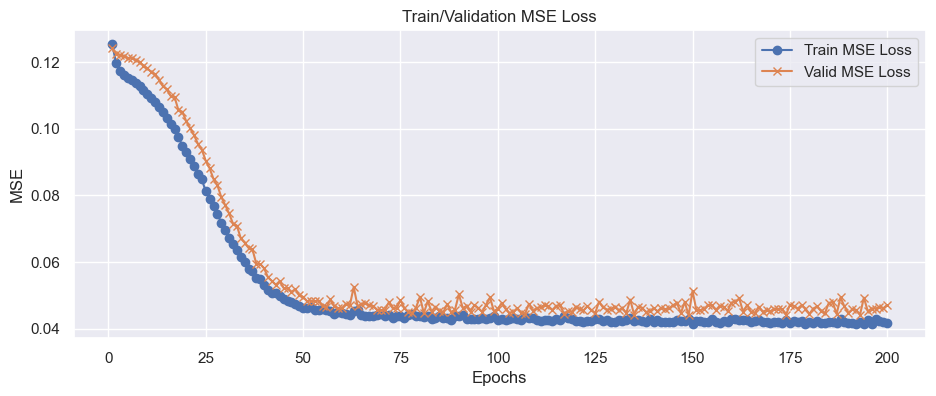

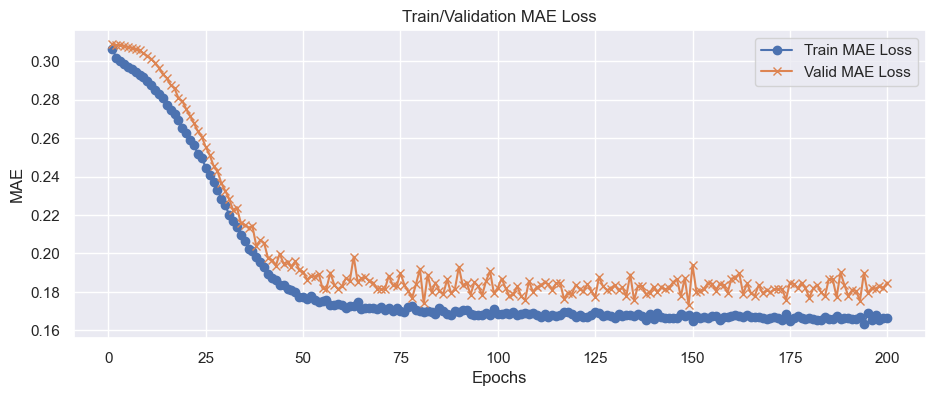

In [37]:
# plotting loss and accuracy 
f, ax = plt.subplots()
ax.plot([None] + bed_bottom_model.history.history['loss'], 'o-')
ax.plot([None] + bed_bottom_model.history.history['val_loss'], 'x-')

ax.legend(['Train MSE Loss', 'Valid MSE Loss'], loc=1)
ax.set_title('Train/Validation MSE Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
f.show()

f, ax = plt.subplots()
ax.plot([None] + bed_bottom_model.history.history['mean_absolute_error'], 'o-')
ax.plot([None] + bed_bottom_model.history.history['val_mean_absolute_error'], 'x-')

ax.legend(['Train MAE Loss', 'Valid MAE Loss'], loc=1)
ax.set_title('Train/Validation MAE Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('MAE')
f.show()

In [38]:
predict = bed_bottom_model.predict(x_test, verbose=0)
y_pred_bed = predict[:,0]
y_pred_bottom = predict[:,1]
print('---------Evaluating Bed Model---------')
evaluate_model(y_test_1, y_pred_bed)
print('\n---------Evaluate Bottom Model---------')
evaluate_model(y_test_2, y_pred_bottom)

---------Evaluating Bed Model---------
Mean Squared Error (MSE): 0.0474
Mean Absolute Error (MAE): 0.1854
R-squared (R2): 0.6035

---------Evaluate Bottom Model---------
Mean Squared Error (MSE): 0.0989
Mean Absolute Error (MAE): 0.2578
R-squared (R2): 0.1877


In [39]:
bed_bottom_model.save('bed_bottom_model.h5')

### Actual Prediction

In [40]:
def predict_real(features, model):
    predict = model.predict(features, verbose=0)
    bed, bottom = predict[:,0], predict[:,1]
    bed = features_scaler['bed width b'].inverse_transform([bed])
    bottom = features_scaler['bottom dead centre'].inverse_transform([bottom])
    return np.squeeze(bed), np.squeeze(bottom)

In [41]:
bed_predict, bottom_predict = predict_real(x_test, bed_bottom_model)

In [42]:
np.round(bed_predict, decimals=1)

array([151.3, 160.5, 166.9, 157.8, 179.5, 148.7, 160. , 174.7, 168.9,
       150. , 172.9, 172.2, 168.2, 146.6, 172.6, 139.1, 151.6, 150.4,
       160.9, 153.9, 167.7, 148.9, 168.6, 136.4, 135.5, 175.3, 177.5,
       135.8, 168.1, 159.3, 169.8, 145.5, 144.7, 155.3, 161.5, 140.8,
       172.4, 135.7, 177. , 135.4, 144.9, 140.1, 132.8, 145. , 142.5,
       156.9, 168.5, 169.3, 159.6, 167.2, 152.4, 146.8, 155.9, 157.7,
       161.5, 170.9, 145.4, 138.3, 139.8, 137.9])

In [43]:
case2_result = pd.DataFrame()
case2_result['Actual bed width'] = np.squeeze(features_scaler['bed width b'].inverse_transform([y_test_1.values]))
case2_result['Predicted bed width'] = np.round(bed_predict, decimals=1)
case2_result['Actual bottom center'] = np.squeeze(features_scaler['bottom dead centre'].inverse_transform([y_test_2.values]))
case2_result['Predicted bottom center'] = np.round(bottom_predict, decimals=1)

In [44]:
case2_result

,Actual bed width,Predicted bed width,Actual bottom center,Predicted bottom center
0,140.0,151.3,1.0,0.7
1,170.0,160.5,0.6,0.9
2,150.0,166.9,1.2,1.0
3,140.0,157.8,1.2,0.8
4,180.0,179.5,1.2,1.2
5,140.0,148.7,0.8,0.7
6,170.0,160.0,0.6,0.9
7,170.0,174.7,0.8,1.1
8,180.0,168.9,0.6,1.0
9,170.0,150.0,0.4,0.7


In [45]:
case2_result.to_csv('case_2_v3.csv')

#### Classical Modeling

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

##### Bed

In [47]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01,0.002, 0.001],
    'n_estimators': [100, 200, 300, 500],
}

# Create an XGBoost classifier
xgb_model = XGBRegressor(objective='reg:squarederror')

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to perform grid search
grid_search.fit(x_train, y_train_1)

# Print the best parameters and best score found
print("Best parameters found: ", grid_search.best_params_)
print("Best negative mean squared error found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best negative mean squared error found:  -0.06335869685011727


In [48]:
# Create a new XGBoost model with the best parameters
bed_xgb_model = XGBRegressor(objective='reg:squarederror', **grid_search.best_params_)
bed_xgb_model.fit(x_train, y_train_1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [49]:
y_pred = bed_xgb_model.predict(x_test)
evaluate_model(y_test_1, y_pred)

Mean Squared Error (MSE): 0.0576
Mean Absolute Error (MAE): 0.2033
R-squared (R2): 0.5181


##### Bottom

In [50]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01,0.002, 0.001],
    'n_estimators': [100, 200, 300, 500],
}

# Create an XGBoost classifier
xgb_model = XGBRegressor(objective='reg:squarederror')

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to perform grid search
grid_search.fit(x_train, y_train_2)

# Print the best parameters and best score found
print("Best parameters found: ", grid_search.best_params_)
print("Best negative mean squared error found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best negative mean squared error found:  -0.11331989188413608


In [51]:
# Create a new XGBoost model with the best parameters
bottom_xgb_model = XGBRegressor(objective='reg:squarederror', **grid_search.best_params_)
bottom_xgb_model.fit(x_train, y_train_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
y_pred = bottom_xgb_model.predict(x_test)
evaluate_model(y_test_2, y_pred)

Mean Squared Error (MSE): 0.1057
Mean Absolute Error (MAE): 0.2722
R-squared (R2): 0.1320


## Real-Time Predict

In [56]:
def real_predict():
    print("Select Case Number")
    print("1. Case 1 (radius)")
    print("2. Case 2 (bed and bottom)")
    name = input("Enter 1 or 2:")
    print('\n---------------------------------')
    min_radius = 1156.8
    max_radius = 3823.9
    if name=="1":
        print("Select Model Type")
        print("a. Classical Model")
        print("b. ANN")
        model_type = input("Enter a or b:")
        bed = np.float32(input("Enter bed width:"))
        spring = np.float32(input("Enter Sheet Thickness Spring Steel:"))
        sheet = np.float32(input("Enter Sheet Thickness Aluminum:"))
        scaleFactor = np.float32(input("Enter scale factor material properties aluminum:"))
        bottom = np.float32(input("Enter bottom dead centre:"))
        
        features = pd.DataFrame(columns=['bed width b', 'sheet thickness spring steel',
                                         'sheet thickness aluminum ',
                                         'scale factor material properties aluminum',
                                         'bottom dead centre'])
        features['bed width b'] = [bed]
        features['sheet thickness spring steel'] = [spring]
        features['sheet thickness aluminum '] = [sheet]
        features['scale factor material properties aluminum'] = [scaleFactor]
        features['bottom dead centre'] = [bottom]
        print('\n---------------------------------')
        features_copy = features.copy()
        for col in features.columns:
            features.loc[:,col] = scaler.transform(features[[col]])
            
        if model_type == 'a':
            predict = radius_xgb_model.predict(features)
            predict = predict.reshape(-1,1)
        elif model_type == 'b':
            predict = radius_model.predict(features, verbose=0)
        radius = features_scaler['radius'].inverse_transform(predict)
        if radius < min_radius: print("Radius is less than Minimum radius")
        elif radius > max_radius: print("Radius is grater than Minimum radius")
        else: print("Radius is in between limited values")
        features_copy['radius'] = radius
        return features_copy
    elif name=="2":
        print("Select Model Type")
        print("a. Classical Model")
        print("b. ANN")
        model_type = input("Enter a or b:")
        spring = np.float32(input("Enter Sheet Thickness Spring Steel:"))
        sheet = np.float32(input("Enter Sheet Thickness Aluminum:"))
        scaleFactor = np.float32(input("Enter scale factor material properties aluminum:"))
        radius = np.float32(input("Enter Radius:"))
        
        features = pd.DataFrame(columns=['sheet thickness spring steel',
                                         'sheet thickness aluminum ',
                                         'scale factor material properties aluminum',
                                         'radius'])
        features['sheet thickness spring steel'] = [spring]
        features['sheet thickness aluminum '] = [sheet]
        features['scale factor material properties aluminum'] = [scaleFactor]
        features['radius'] = [radius]
        print('\n---------------------------------')
        features_copy = features.copy()
        for col in features.columns:
            features.loc[:,col] = scaler.transform(features[[col]])
            
        if model_type == 'a':
            bed = bed_xgb_model.predict(features)
            bed = np.round(bed, decimals=1).reshape(-1,1)
            bottom = bottom_xgb_model.predict(features)
            bottom = np.round(bottom, decimals=1).reshape(-1,1)
        elif model_type == 'b':
            predict = bed_bottom_model.predict(features, verbose=0)
            bed, bottom = predict[:,0], predict[:,1]
            bed = np.round(bed, decimals=1).reshape(-1,1)
            bottom = np.round(bottom, decimals=1).reshape(-1,1)
        bed = features_scaler['bed width b'].inverse_transform(bed)
        bottom = features_scaler['bottom dead centre'].inverse_transform(bottom)

        features_copy['bed width b'] = bed
        features_copy['bottom dead centre'] = bottom
        return features_copy

In [57]:
real_predict()

Select Case Number
1. Case 1 (radius)
2. Case 2 (bed and bottom)
Enter 1 or 2:1

---------------------------------
Select Model Type
a. Classical Model
b. ANN
Enter a or b:b
Enter bed width:160
Enter Sheet Thickness Spring Steel:1.6
Enter Sheet Thickness Aluminum:3.4
Enter scale factor material properties aluminum:1.1
Enter bottom dead centre:0.9

---------------------------------
Radius is in between limited values


,bed width b,sheet thickness spring steel,sheet thickness aluminum,scale factor material properties aluminum,bottom dead centre,radius
0,160.0,1.6,3.4,1.1,0.9,2078.598389


In [59]:
real_predict()

Select Case Number
1. Case 1 (radius)
2. Case 2 (bed and bottom)
Enter 1 or 2:2

---------------------------------
Select Model Type
a. Classical Model
b. ANN
Enter a or b:b
Enter Sheet Thickness Spring Steel:1.6
Enter Sheet Thickness Aluminum:3.5
Enter scale factor material properties aluminum:1.1
Enter Radius:1.1

---------------------------------


,sheet thickness spring steel,sheet thickness aluminum,scale factor material properties aluminum,radius,bed width b,bottom dead centre
0,1.6,3.5,1.1,1.1,130.0,0.4
